# 💻 Ayudantía 01: Introducción a Python para computación científica

## Pablo Zurita Soler (pzurita@uc.cl)

Inspirado en tutoriales de Daniel Hurtado, Agustín Cox y Benjamín Villa.

En esta ayudantía veremos cómo usar Python para ayudarnos a resolver problemas científico-matemáticos conceptualmente.

**Omisiones notables**: control de flujo y métodos numéricos (se ven bastante en otros cursos)

# 💻+🔬 Computación científica

Desde que tenemos (super)computadores, la **simulación** se sumó a la _teoría_ y la _experimentación_ como una forma fundamental de hacer ciencia. Estas tres no son excluyentes, más bien son parte de un proceso iterativo donde se apoyan entre sí.

Existen muchos lenguajes de programación con buena afinidad con computación científica. Clásicamente, existe C, Fortran, C++, MATLAB/Octave, entre otros. Últimamente ha surgido un poco de _buzz_ por Julia (tengan ojo con ese). Nosotros/as/es, por su versatilidad y accesibilidad, nos concentraremos en **Python**. Para hacer computación científica en Python, necesitaremos **NumPy**.

**Pero antes de empezar**, hay que enfatizar el saber Googlear y saber leer documentación.

# 🔢🐍 Fundamentos de NumPy

## 💤 Lo básico: variables y números

En Python, se asignan valores a variables usando el operador `=`. Los números se tratan con muchos _tipos de datos_ distintos, pero los que probablemente conocen son `float` e `int` (¡hay otros!).

In [1]:
a = 2  # El valor 2 (int) está asignado a "a"
b = 3.  # El valor 3 (float) está asignado a "b"
ϕ = b  # El valor referenciado por "b" está asignado a "φ"

b += a  # Se le reasigna a b su valor referenciado, más el referenciado en a
ϕ

3.0

In [2]:
b

5.0

Recordar que `*` es multiplicación y `**` es exponenciación, **no** `^`.

In [3]:
a*b

10.0

In [4]:
a^b  # No va a funcionar

TypeError: unsupported operand type(s) for ^: 'int' and 'float'

In [5]:
a**b

32.0

Nota histórica: en Python 2, `/` servía como dos operadores distintos. Si sus _inputs_ eran de tipo `int`, entregaba división parte entera (lo que ahora es `//`). Por esto, es costumbre de mucha gente instanciar todo como `float` aunque parezca innecesario.

In [6]:
a = 2
b = 3

a/b  # En Python 2, esto retorna 0. En Python 3, retorna 2/3

0.6666666666666666

In [7]:
a//b  # Esto era lo que retornaba (horrible, lo sé)

0

NumPy extiende mucho las capacidades matemáticas de Python. En primer lugar, entrega muchas funciones predefinidas.

In [8]:
import numpy as np  # Con esto se puede llamar a NumPy mediante el objeto np

In [9]:
np.arctan(1)/np.pi

0.25

## 📃 Arreglos

La unidad básica de computación científica (numérica) son **arreglos** de números. Computacionalmente, son como listas, pero mejores 😊. Se generan llamando la función `array` sobre un objeto iterable.

In [10]:
mi_arreglo = np.array([1, 2, 3])
mi_arreglo

array([1, 2, 3])

Los arreglos pueden ser $n$-dimensionales, lo que les entrega mucha versatilidad.

In [11]:
mi_segundo_arreglo = np.array([
        [1, 2, 3],
        [4, 5, 6]
    ])
mi_segundo_arreglo

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
mi_segundo_arreglo.shape

(2, 3)

In [13]:
mi_segundo_arreglo.size

6

Para generar un arreglo ordenado sirve la función `arange`.

In [14]:
mi_rango = np.arange(0, 2.1, 0.4)
mi_rango

array([0. , 0.4, 0.8, 1.2, 1.6, 2. ])

In [15]:
rango_clásico = range(0, 2.1, 0.4)

TypeError: 'float' object cannot be interpreted as an integer

Recuerden que solo necesitan un iterable...

In [16]:
mi_tercer_rango = np.array(range(10))  # ¡range retorna un objeto iterable!
mi_tercer_rango

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Pero quizás van a usar más la función `linspace` que genera un arreglo **equiespaciado**.

In [17]:
x = np.linspace(0, 2.1, 10)
x

array([0.        , 0.23333333, 0.46666667, 0.7       , 0.93333333,
       1.16666667, 1.4       , 1.63333333, 1.86666667, 2.1       ])

La mayoría de las operaciones aritméticas simples se pueden realizar con facilidad _element-wise_ (elemento a elemento) sobre arreglos.

In [18]:
y = 2*(x+3)
y

array([ 6.        ,  6.46666667,  6.93333333,  7.4       ,  7.86666667,
        8.33333333,  8.8       ,  9.26666667,  9.73333333, 10.2       ])

In [19]:
y = np.linspace(0, 1, 10)
x+y

array([0.        , 0.34444444, 0.68888889, 1.03333333, 1.37777778,
       1.72222222, 2.06666667, 2.41111111, 2.75555556, 3.1       ])

Y por último debiesen tener ojo con la indexación.

In [20]:
mi_segundo_arreglo  # Todo

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
mi_segundo_arreglo[0]  # El primer elemento (fila)

array([1, 2, 3])

In [22]:
mi_segundo_arreglo[0, 1]  # El elemento 1,2

2

Mucho ojo...

In [23]:
mi_segundo_arreglo[0, :]  # Fijo la primera dimensión y recorro la segunda

array([1, 2, 3])

In [24]:
mi_segundo_arreglo[-1]  # El último elemento (fila)

array([4, 5, 6])

In [30]:
mi_segundo_arreglo[:, 0]  # Fijo la segunda dimensión y recorro la primera

array([1, 4])

In [31]:
mi_segundo_arreglo[:][0]  # Recorro los elementos y escojo el primero (!!!)

array([1, 2, 3])

## 💡 Un poco de álgebra lineal

NumPy provee muchas funcionalidades **eficientes** de álgebra lineal.

In [55]:
A = np.matrix([
    [1, 3, 5],
    [3, 4, 2],
    [5, 2, 0]
])  # Subclase de array, pero fijado en 2D y con _syntax sugar_ para álgebra

v = np.matrix([1, 0, 0])

otro_v = np.array([1, 0, 0])

In [51]:
A

matrix([[1, 3, 5],
        [3, 4, 2],
        [5, 2, 0]])

In [52]:
v

matrix([[1],
        [0],
        [0]])

In [53]:
otro_v

array([1, 0, 0])

Permite realizar operaciones de forma eficiente por tener _back-end_ en C++. Algunas operaciones básicas...

In [36]:
A.T  # Transpuesta fácil y rápida

matrix([[1, 3, 5],
        [3, 4, 2],
        [5, 2, 0]])

In [37]:
np.linalg.inv(A)  # Inversa eficiente, lo mismo que A.I

matrix([[ 0.09090909, -0.22727273,  0.31818182],
        [-0.22727273,  0.56818182, -0.29545455],
        [ 0.31818182, -0.29545455,  0.11363636]])

Probemos multiplicaciones.

In [38]:
B = np.matrix([[1, 1, 1], [2, 2, 2], [3, 3, 3]])

In [42]:
np.matmul(A, B)  # Multiplicación matricial

matrix([[22, 22, 22],
        [17, 17, 17],
        [ 9,  9,  9]])

In [40]:
A @ B  # Implementación rápida

matrix([[22, 22, 22],
        [17, 17, 17],
        [ 9,  9,  9]])

La función `dot` es la generalización del producto punto y el producto matriz-vector

In [56]:
np.dot(v, otro_v)  # ¿matrix con array? Ningún problema, retorna matrix

matrix([[1]])

In [60]:
np.dot(A, v.T)  # Producto matriz-vector estándar, ajusta a dimensiones

matrix([[1],
        [3],
        [5]])

NumPy trata de hacerle la vida fácil a la gente, pero hay que tener ojo y leer bien la documentación

In [61]:
np.dot(A, otro_v)  # ¿matrix con array? Ningún problema, retorna matrix

matrix([[1, 3, 5]])

In [62]:
np.dot(A, v)  # matrix con matrix -> ¡ajusta a dimensiones!

ValueError: shapes (3,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

¿Cuál es la diferencia entre `matrix` y `array`?

In [63]:
A = np.array([[1, 2], [1, 2]])
B = np.array([[1, 0], [0, 1]])
A_matrix = np.asmatrix(A)
B_matrix = np.asmatrix(B)

In [64]:
A_matrix*B_matrix

matrix([[1, 2],
        [1, 2]])

In [65]:
A*B

array([[1, 0],
       [0, 2]])

¡Los `array` funcionan elemento a elemento con operadores simples por defecto, a diferencia de `matrix`!

Lección: ser **consistente**. Hay básicamente tres opciones, mejor escoger una y quedarse con eso:
1. Para matrices y vectores, siempre usar `matrix` (esta es la opción cuya sintaxis se parece más a la matemática)
2. Usar `matrix` solo para matrices y usar `array` para vectores (esta opción es común)
3. Solo usar `array` (esta es la opción sustentable y generalizable, pero implica acostumbrarse a usar métodos explíticos, como `np.dot` en vez de `*`)

Otras cosas que se pueden hacer con matrices...

In [66]:
detA = np.linalg.det(A)  # Determinante
detA

0.0

In [67]:
eigs = np.linalg.eig(A)  # Eigensystem, autovalores y autovectores
eigs

(array([0., 3.]),
 array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

In [68]:
eigs[0]  # Valores propios

array([0., 3.])

In [69]:
eigs[1]  # Vectores propios

array([[-0.89442719, -0.70710678],
       [ 0.4472136 , -0.70710678]])

In [70]:
eigs[1][0]  # Vector propio del primer valor propio

array([-0.89442719, -0.70710678])

In [71]:
eig_vals = np.linalg.eigvals(A)  # Solo valores propios
eig_vals

array([0., 3.])

Y tenemos herramientas para construir matrices

In [72]:
I = np.eye(3)  # Identidad
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [73]:
D = np.diag([1, 2, 3])  # Crear una matriz diagonal a partir de un arreglo 1D
D

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [74]:
R = np.vstack([I, D])  # Juntar dos arreglos verticalmente (hstack para horizontal)
R

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

Por último, pero no menos importante, resolución (inocente) de sistemas lineales.

In [75]:
A = np.matrix([
    [1, 2, 3],
    [4, 0, 6],
    [7, 8, 0]
])

v = np.matrix([
    [1],
    [2],
    [3]
])

Recuerden: NumPy está escrito en C++ por detrás. Siempre que tengan que hacer algo y NumPy ofrezca una herramienta _específicamente diseñada para esa tarea_, **usen eso**.

In [76]:
np.linalg.inv(A)*v  # No hagan esto, aunque sirva

matrix([[0.27272727],
        [0.13636364],
        [0.15151515]])

In [77]:
np.linalg.solve(A, v)  # Hagan esto

matrix([[0.27272727],
        [0.13636364],
        [0.15151515]])

## 🎈 Funciones

Función matemática: objeto **abstracto** con representación (muy probablemente) **simbólica**

\begin{align*}
    f : \mathbb{R} & \to \mathbb{R} \\
    x & \mapsto \left( \sin{x} \right)^{3}
\end{align*}

equivale a 

$$
    f(x) := \left( \sin{x} \right)^{3}
$$

Función computacional: objeto **computacional** que dado un `input` entrega un `output`

In [78]:
def f(x):
    return np.sin(x)**3
f

<function __main__.f(x)>

In [79]:
def otro_f(x):
    a = np.sin(x)
    return a
otro_f

<function __main__.otro_f(x)>

En computación **numérica** (NumPy, MATLAB, C++) representamos funciones como **arreglos de sus valores** (a diferencia de la computación simbólica como Mathematica, SymPy o Maple). Sería algo como

$$
    f_{i} := f(x_{i})
$$

para una sucesión

$$
    \{x_{i}\}_{i = 0}^{N-1}
$$

En el ejemplo de abajo, $x_{i} := \frac{i}{100}$ y $N = 101$

In [80]:
x = np.linspace(0, 1, 100)
x.shape

(100,)

Y entonces **representamos** la función $f$ como un arreglo de valores

In [81]:
f_array = f(x)  # ¿Qué hace esta línea?
f_array

array([0.00000000e+00, 1.03055758e-06, 8.24319891e-06, 2.78137005e-05,
       6.59052301e-05, 1.28662057e-04, 2.22203281e-04, 3.52616581e-04,
       5.25951997e-04, 7.48215748e-04, 1.02536408e-03, 1.36329718e-03,
       1.76785313e-03, 2.24480189e-03, 2.79983942e-03, 3.43858179e-03,
       4.16655941e-03, 4.98921134e-03, 5.91187964e-03, 6.93980387e-03,
       8.07811566e-03, 9.33183336e-03, 1.07058568e-02, 1.22049623e-02,
       1.38337974e-02, 1.55968762e-02, 1.74985747e-02, 1.95431257e-02,
       2.17346150e-02, 2.40769763e-02, 2.65739876e-02, 2.92292668e-02,
       3.20462676e-02, 3.50282764e-02, 3.81784079e-02, 4.14996022e-02,
       4.49946211e-02, 4.86660454e-02, 5.25162715e-02, 5.65475090e-02,
       6.07617778e-02, 6.51609058e-02, 6.97465266e-02, 7.45200775e-02,
       7.94827973e-02, 8.46357251e-02, 8.99796984e-02, 9.55153518e-02,
       1.01243116e-01, 1.07163217e-01, 1.13275674e-01, 1.19580301e-01,
       1.26076705e-01, 1.32764287e-01, 1.39642240e-01, 1.46709550e-01,
      

Noten que el significado **simbólico** de `f_array` está ligado a `x`, y si por ejemplo definimos

In [82]:
y = np.linspace(-10, 10, 100)

Podríamos interpretar `f_array` como algo completamente distinto (lo veremos en un ratito). Lección: **lleven cuenta de cómo representan funciones** y **pónganles buenos nombres a sus variables**.

## 📈 Gráficos

Hay varias elecciones de buenas librerías para gráficos que podemos usar en Python. La más popular, y la que usaremos nosotros, es Matplotlib.

In [83]:
import matplotlib.pyplot as plt
#plt.style.use('classic')  # Protip: usen esto

Pyplot es un módulo de Matplotlib que genera gráficos. La sintaxis básica es la siguiente, pero se puede complicar cuanto uno quiera.

**Googlear lo que uno quiere hacer específicamente es buena idea, ojalá en inglés.** Además, siempre se puede preguntar 😁.

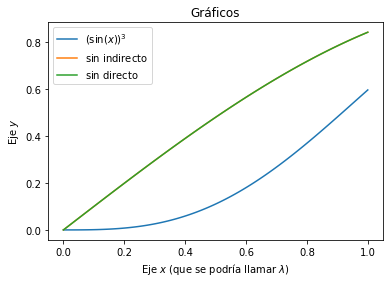

In [89]:
plt.figure()  # Iniciar una figura
plt.plot(x, f_array, label=r"$\left(\sin(x)\right)^{3}$")  # x y f_array son args
plt.plot(x, otro_f(x), label=r'$\sin$ indirecto')  # label es un keyword kwargs
plt.plot(x, np.sin(x), label=r'$\sin$ directo')  # plot es una función
#plt.xlim([-5,5])  # Modifica los límites del gráfico
#plt.ylim([-1.2, 1.2])  # Modifica los límites del gráfico
plt.xlabel(r'Eje $x$ (que se podría llamar $\lambda$)')
plt.ylabel(r'Eje $y$')
plt.title(r'Gráficos')    # La "r" es para un "raw string"
#plt.savefig('./grafico.pdf')  # Guardar (¡siempre como PDF!)
plt.legend()
#plt.show()  # Para mostrar el resultado

¿Se acuerdan de lo que dijimos de la diferencia entre $f$ y su representación? Acá el ejemplo.

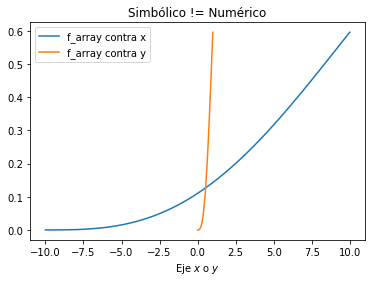

In [90]:
plt.figure()
plt.plot(y, f_array, label=r'f_array contra x')
plt.plot(x, f_array, label=r'f_array contra y')
plt.xlabel(r'Eje $x$ o $y$')
plt.title(r'Simbólico != Numérico')
plt.legend()

¿Y para graficar, o pensar, funciones de dos variables? El concepto de "grilla" se extiende a $n$ dimensiones.

In [91]:
def gaussian(x, y):
    return np.exp(-(x**2 + y**2))

In [92]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x.shape

(100,)

Para esto invocamos la función `meshgrid` que genera una grilla.

In [93]:
xx, yy = np.meshgrid(x, y)
gaussian_array = gaussian(xx, yy)  # Se puede llamar sobre arrays
xx.shape  # ¿Qué es xx?

(100, 100)

Para gráficos 3D...

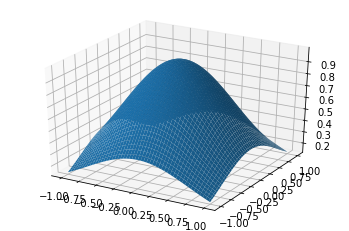

In [94]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, gaussian_array)

O quizás sea mejor usar algo más legible.

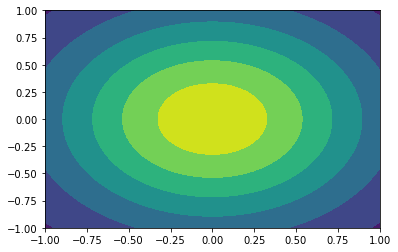

In [95]:
plt.figure()
plt.contourf(xx, yy, gaussian_array)

# 👓 Cosas que les pueden servir

0. **Acostumbrarse a Googlear y leer documentación**

    Siempre que se puede, en inglés y con palabras clave. Usar comillas y fijarse en versiones.

    La documentación de NumPy está en https://numpy.org/doc/stable/contents.html
    
    La documentación de Matplotlib está en https://matplotlib.org/stable/contents.html
    
    ¡Ojo con las versiones!

1. CodeAcademy (https://www.codecademy.com/)
2. QuantEcon (https://python-programming.quantecon.org/)
3. Jupyter Notebooks o Google Colab (https://jupyter.org/ o https://colab.research.google.com/)


# 📚 Algunas cosas que pueden aprender y probablemente les sean útiles*

*pero no son necesarias para este curso

1. Git y GitHub (https://github.com/)
2. PEP8 (https://www.python.org/dev/peps/pep-0008/)
3. C++ y Julia
4. Pandas y TensorFlow